# Battery discharge (FS2011, Ni-MH)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal

%matplotlib widget

## Load data

In [2]:
# Load data
data_file = 'batterydischarge-data.csv'

x_csv = np.loadtxt(data_file, delimiter=',', dtype=str)

x = np.float64(x_csv[:, 1]) * 3.3 / 4096 / 2

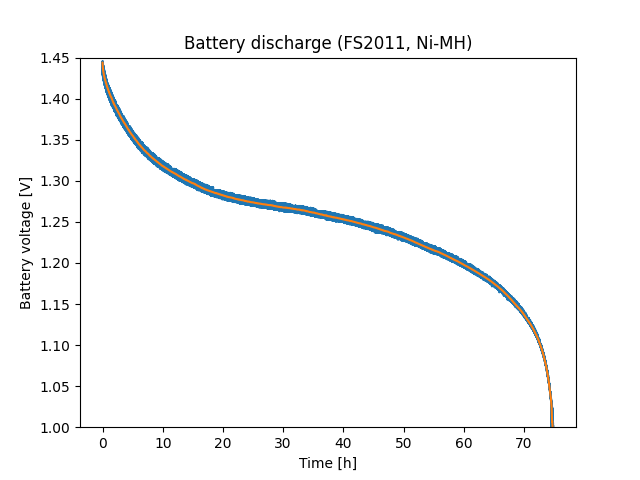

In [3]:
i = np.arange(0, len(x)) / 3600

# First-order butterworth filter
alpha = 0.99
x_filt = scipy.signal.filtfilt([1 - alpha], [1, -alpha], x)

# Plot
plt.figure()
plt.title('Battery discharge (FS2011, Ni-MH)')
plt.xlabel('Time [h]')
plt.ylabel('Battery voltage [V]')
plt.plot(i, x, i, x_filt)
plt.ylim(1, 1.45)
plt.show()

# Battery level thresholds

In [6]:
N = 7

i = np.rint(np.linspace(0, len(x_filt) - 1, N)).astype(int)

np.flip(x_filt[i][1:-1])

array([1.18759274, 1.23116887, 1.25699877, 1.27376153, 1.30672699])